#Data Preparation

##Import Packages and Read Original Dataset with All Movie Informations

In [1]:
# Import packages first
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import math
# Set seaborn theme to default
sns.set_theme()
# Set max display columns to none to be able to see all column information
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

# Read from original file
df = pd.read_csv('https://raw.githubusercontent.com/fbhsaid/DAV-5400/main/AllInfo.csv', index_col=0)
df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,The Shawshank Redemption,1994.0,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",81.0,9.3,"2,662,343",tt0111161,movie,21 Dec 1999,"$28,767,189",NaN,NaN,True,NaN
1,The Godfather,1972.0,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",United States,Won 3 Oscars. 32 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100.0,9.2,"1,847,150",tt0068646,movie,11 May 2004,"$136,381,073",NaN,NaN,True,NaN
2,The Dark Knight,2008.0,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 160 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84.0,9.0,"2,638,780",tt0468569,movie,09 Dec 2008,"$534,987,076",NaN,NaN,True,NaN
3,The Lord of the Rings: The Return of the King,2003.0,PG-13,17 Dec 2003,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Viggo Mortensen, Ian McKellen",Gandalf and Aragorn lead the World of Men agai...,"English, Quenya, Old English, Sindarin","New Zealand, United States",Won 11 Oscars. 209 wins & 124 nominations total,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,9.0,"1,837,587",tt0167260,movie,25 May 2004,"$378,251,207",NaN,NaN,True,NaN
4,Schindler's List,1993.0,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally, Steven Zaillian","Liam Neeson, Ralph Fiennes, Ben Kingsley","In German-occupied Poland during World War II,...","English, Hebrew, German, Polish, Latin",United States,Won 7 Oscars. 91 wins & 49 nominations total,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,9.0,"1,349,692",tt0108052,movie,12 Feb 2008,"$96,898,818",NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sabrina,1954.0,Passed,15 Oct 1954,113 min,"Comedy, Drama, Romance",Billy Wilder,"Billy Wilder, Samuel A. Taylor, Ernest Lehman","Humphrey Bogart, Audrey Hepburn, William Holden",A playboy becomes interested in the daughter o...,"English, French",United States,Won 1 Oscar. 7 wins & 8 nominations total,https://m.media-amazon.com/images/M/MV5BYmFlNT...,"[{'Source': 'Internet Movie Database', 'Value'...",72.0,7.6,"65,766",tt0047437,movie,10 Apr 2001,NaN,NaN,NaN,True,NaN
996,From Here to Eternity,1953.0,Passed,28 Aug 1953,118 min,"Drama, Romance, War",Fred Zinnemann,"Daniel Taradash, James Jones","Burt Lancaster, Montgomery Clift, Deborah Kerr","At a U.S. Army base in 1941 Hawaii, a private ...",English,United States,Won 8 Oscars. 25 wins & 9 nominations total,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,"[{'Source': 'Internet Movie Database', 'Value'...",85.0,7.6,"47,409",tt0045793,movie,04 Mar 2003,"$36,416",NaN,NaN,True,NaN
997,Snow White and the Seven Dwarfs,1937.0,Approved,04 Feb 1938,83 min,"Animation, Adventure, Family","William Cottrell, David Hand, Wilfred Jackson","Jacob Grimm, Wilhelm Grimm, Ted Sears","Adriana Caselotti, Harry Stockwell, Lu

###Check for missing information

<Axes: >

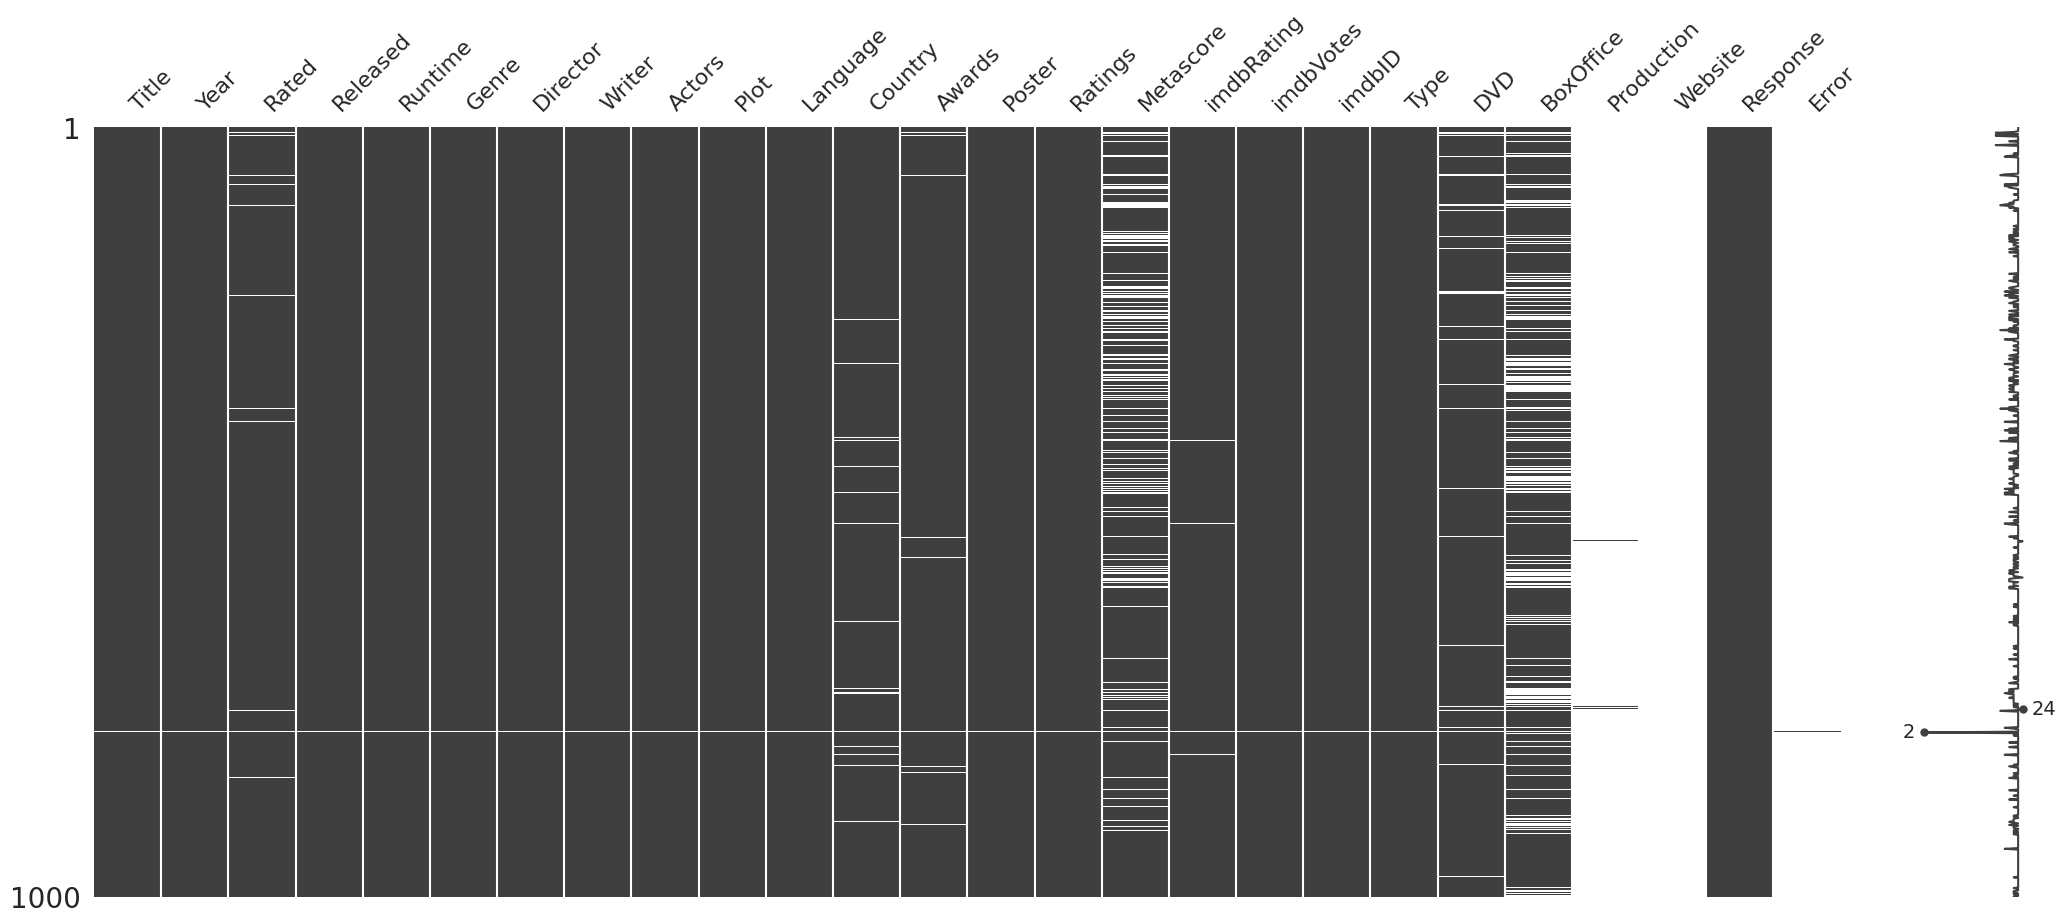

In [2]:
# Import packages to draw misssing information
import missingno as msno
# Draw missing information matrix
msno.matrix(df)

<Axes: >

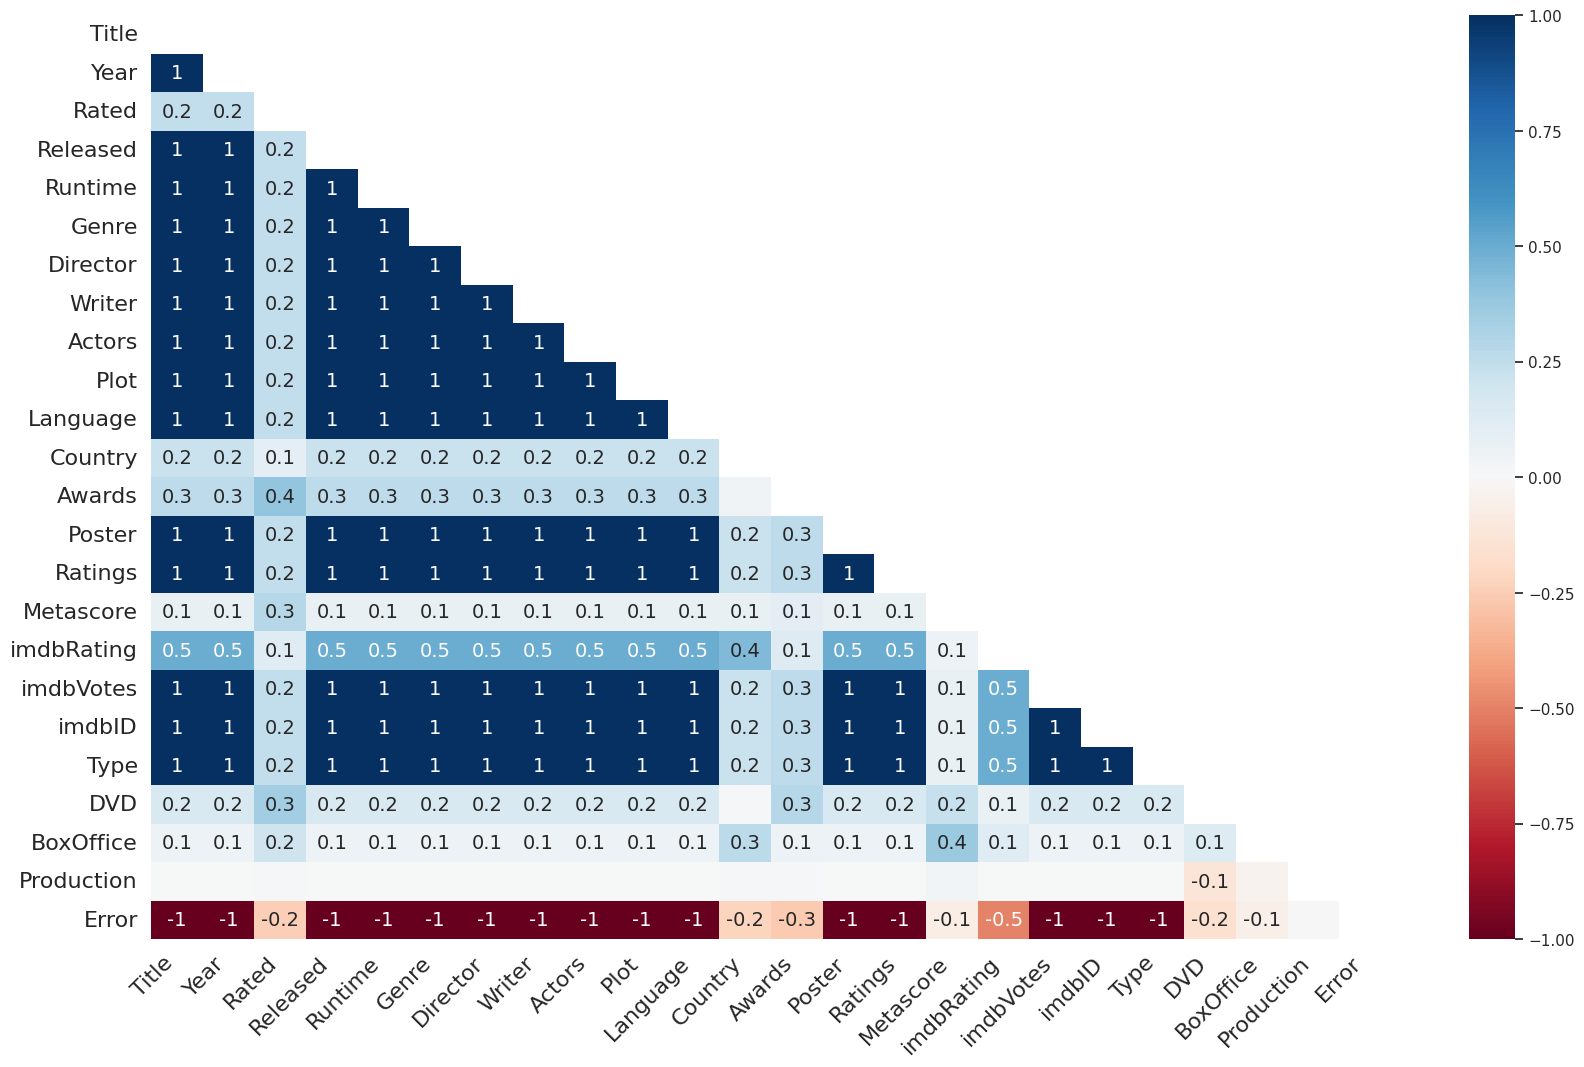

In [3]:
# Show heatmap for missing information matrix
msno.heatmap(df)

##Pick out attributes of our interest

### Drop irrelevant columns

In [4]:
# Create a temaporary dataframe to drop irrelevant columns and not interested variables
temp = df.dropna(
    subset=['Title', 'Plot', 'Year', 'Metascore', 'imdbRating', 'Ratings', 'BoxOffice', 'Director'], 
    how='any')

# Save filtered information as a new dataframe called moviesdata
moviesdata = temp[['Title', 'Plot', 'Year', 'Metascore', 'imdbRating']].copy()

# Name new dataframe's index 'movieId'
moviesdata.index.name = 'movieId'
moviesdata

,Title,Plot,Year,Metascore,imdbRating
movieId,,,,,
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994.0,81.0,9.3
1,The Godfather,The aging patriarch of an organized crime dyna...,1972.0,100.0,9.2
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008.0,84.0,9.0
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003.0,94.0,9.0
4,Schindler's List,"In German-occupied Poland during World War II,...",1993.0,94.0,9.0
...,...,...,...,...,...
990,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,1967.0,65.0,7.6
993,Eyes Without a Face,A surgeon causes an accident which leaves his ...,1960.0,90.0,7.6
994,Rebel Without a Cause,A rebellious young man with a troubled past co...,1955.0,89.0,7.6


###Extract Rotten Tomatoes Ratings

In [5]:
# Define function with row as input
def findTomato(item):
    # If no value in ratings or null, return nan
    if item is np.nan or not item: 
        return np.nan
    # Otherwise use load as json
    ratings = json.loads(item)
    # Since the value is in 'source value' format, we locate source as rotten tomatoes and return its value in integer type
    for rating in ratings: 
        if rating['Source'] == 'Rotten Tomatoes':
            return int(rating['Value'][:-1])
    # If no source of rotten tomatoes is found in row.Ratings, return nan
    return np.nan

# First replace '' in ratings to "" so that it could be load in json
ratings = df['Ratings'].str.replace("'", '"')

# Apply findTomato to our dataframe and save it as a new column called 'RottenTomatoes'
moviesdata['RottenTomatoes'] = ratings.apply(findTomato)
print(moviesdata['RottenTomatoes'].describe())

moviesdata

count    700.000000
mean      88.162857
std       10.215800
min       27.000000
25%       84.000000
50%       91.000000
75%       95.000000
max      100.000000
Name: RottenTomatoes, dtype: float64


,Title,Plot,Year,Metascore,imdbRating,RottenTomatoes
movieId,,,,,,
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994.0,81.0,9.3,91.0
1,The Godfather,The aging patriarch of an organized crime dyna...,1972.0,100.0,9.2,97.0
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008.0,84.0,9.0,94.0
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003.0,94.0,9.0,93.0
4,Schindler's List,"In German-occupied Poland during World War II,...",1993.0,94.0,9.0,98.0
...,...,...,...,...,...,...
990,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,1967.0,65.0,7.6,88.0
993,Eyes Without a Face,A surgeon causes an accident which leaves his ...,1960.0,90.0,7.6,96.0
994,Rebel Without a Cause,A rebellious young man with a troubled past co...,1955.0,89.0,7.6,93.0


###Extract Box Office

In [6]:
# Extract box office from original dataset and add to moviesdata dataframe
moviesdata['BoxOffice'] = df['BoxOffice'].str.extract(r'(\d+)')
moviesdata['BoxOffice'] = moviesdata['BoxOffice'].astype(int)
print(moviesdata['BoxOffice'].describe())
# Show result
moviesdata

count    713.000000
mean     120.859748
std      171.136403
min        1.000000
25%       16.000000
50%       52.000000
75%      156.000000
max      974.000000
Name: BoxOffice, dtype: float64


,Title,Plot,Year,Metascore,imdbRating,RottenTomatoes,BoxOffice
movieId,,,,,,,
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994.0,81.0,9.3,91.0,28
1,The Godfather,The aging patriarch of an organized crime dyna...,1972.0,100.0,9.2,97.0,136
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008.0,84.0,9.0,94.0,534
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003.0,94.0,9.0,93.0,378
4,Schindler's List,"In German-occupied Poland during World War II,...",1993.0,94.0,9.0,98.0,96
...,...,...,...,...,...,...,...
990,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,1967.0,65.0,7.6,88.0,141
993,Eyes Without a Face,A surgeon causes an accident which leaves his ...,1960.0,90.0,7.6,96.0,58
994,Rebel Without a Cause,A rebellious young man with a troubled past co...,1955.0,89.0,7.6,93.0,212


###Extract Director ID


In [7]:
# Define function to get first director in the original dataset
def getFirstDirector(directors):
    if isinstance(directors, str):
        return directors.split(',')[0].strip()
    else:
        return None

In [8]:
# Apply function to get first directors and give ID stored in a new dataframe
directors_df = pd.DataFrame(df['Director'].apply(getFirstDirector).values, columns=['Director'])\
    .drop_duplicates(ignore_index=True)\
    .reset_index(names=['ID'])\
    .set_index('Director')
# Show resulting dataframe
directors_df

,ID
Director,
Frank Darabont,0
Francis Ford Coppola,1
Christopher Nolan,2
Peter Jackson,3
Steven Spielberg,4
...,...
Robert Clouse,552
Gene Saks,553
Wolfgang Reitherman,554


In [9]:
# Add new dierctorID column to our moviesdata dataframe
moviesdata['DirectorID'] = df['Director'].apply(
    lambda d: directors_df.loc[getFirstDirector(d)].ID)
print(moviesdata['DirectorID'].describe())
# Show result
moviesdata

count    713.000000
mean     225.152875
std      167.290840
min        0.000000
25%       74.000000
50%      199.000000
75%      362.000000
max      556.000000
Name: DirectorID, dtype: float64


,Title,Plot,Year,Metascore,imdbRating,RottenTomatoes,BoxOffice,DirectorID
movieId,,,,,,,,
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994.0,81.0,9.3,91.0,28,0
1,The Godfather,The aging patriarch of an organized crime dyna...,1972.0,100.0,9.2,97.0,136,1
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008.0,84.0,9.0,94.0,534,2
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003.0,94.0,9.0,93.0,378,3
4,Schindler's List,"In German-occupied Poland during World War II,...",1993.0,94.0,9.0,98.0,96,4
...,...,...,...,...,...,...,...,...
990,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,1967.0,65.0,7.6,88.0,141,554
993,Eyes Without a Face,A surgeon causes an accident which leaves his ...,1960.0,90.0,7.6,96.0,58,555
994,Rebel Without a Cause,A rebellious young man with a troubled past co...,1955.0,89.0,7.6,93.0,212,351


###Post Processing

<Axes: >

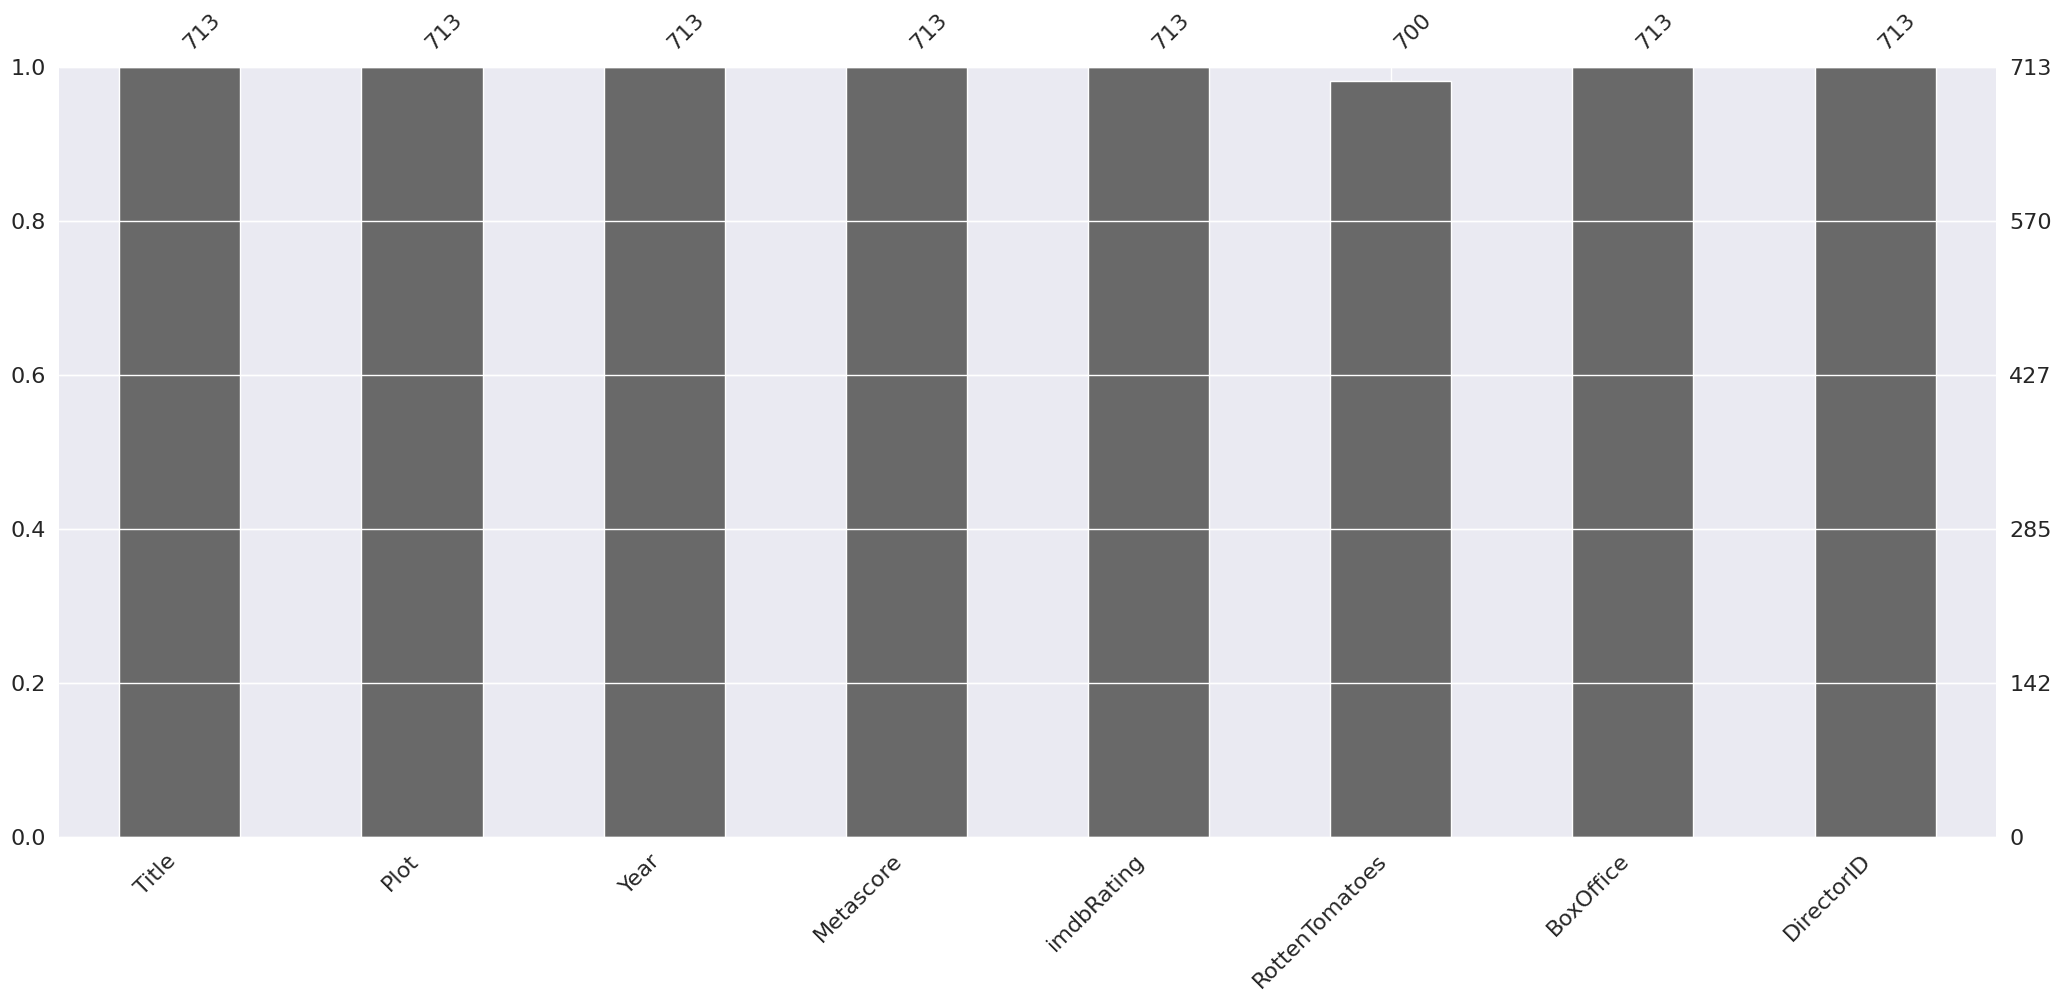

In [10]:
# Check missing info again
msno.bar(moviesdata)

In [11]:
# Drop any remaining null values
moviesdata = moviesdata.dropna(how='any').reset_index(drop=True)
# Show final resulting moviesdata dataframe
moviesdata

,Title,Plot,Year,Metascore,imdbRating,RottenTomatoes,BoxOffice,DirectorID
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,1994.0,81.0,9.3,91.0,28,0
1,The Godfather,The aging patriarch of an organized crime dyna...,1972.0,100.0,9.2,97.0,136,1
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2008.0,84.0,9.0,94.0,534,2
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,2003.0,94.0,9.0,93.0,378,3
4,Schindler's List,"In German-occupied Poland during World War II,...",1993.0,94.0,9.0,98.0,96,4
...,...,...,...,...,...,...,...,...
695,The Odd Couple,A New Yorker newly separated from his wife mov...,1968.0,86.0,7.6,98.0,44,553
696,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,1967.0,65.0,7.6,88.0,141,554
697,Eyes Without a Face,A surgeon causes an accident which leaves his ...,1960.0,90.0,7.6,96.0,58,555
698,Rebel Without a Cause,A rebellious young man with a troubled past co...,1955.0,89.0,7.6,93.0,212,351


##Separate into dataframes

###Get movie name dataframe

In [12]:
# Select title from moviesdata and reset index name to 'ID', then set title to index again
movie_names = moviesdata[['Title']].reset_index(names=['ID']).set_index('Title', drop=False)
movie_names

,ID,Title
Title,,
The Shawshank Redemption,0,The Shawshank Redemption
The Godfather,1,The Godfather
The Dark Knight,2,The Dark Knight
The Lord of the Rings: The Return of the King,3,The Lord of the Rings: The Return of the King
Schindler's List,4,Schindler's List
...,...,...
The Odd Couple,695,The Odd Couple
The Jungle Book,696,The Jungle Book
Eyes Without a Face,697,Eyes Without a Face


In [13]:
# Check for duplications
movie_names.duplicated().sum()

0

###Get movie title and plot dataframe

In [14]:
# Separate plot, title, and directorID out in to plot_df
plot_df = moviesdata[['Title', 'Plot', 'DirectorID']].copy()
plot_df

,Title,Plot,DirectorID
0,The Shawshank Redemption,Two imprisoned men bond over a number of years...,0
1,The Godfather,The aging patriarch of an organized crime dyna...,1
2,The Dark Knight,When the menace known as the Joker wreaks havo...,2
3,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,3
4,Schindler's List,"In German-occupied Poland during World War II,...",4
...,...,...,...
695,The Odd Couple,A New Yorker newly separated from his wife mov...,553
696,The Jungle Book,Bagheera the Panther and Baloo the Bear have a...,554
697,Eyes Without a Face,A surgeon causes an accident which leaves his ...,555
698,Rebel Without a Cause,A rebellious young man with a troubled past co...,351


###Get critic ratings and quantitative attributes dataframe

In [15]:
#Set display option to show all numbers to three digits after decimal and no notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Select relevant columns from the moviesdata df
critic_df = moviesdata[['Year', 'BoxOffice', 'Metascore', 'imdbRating', 'RottenTomatoes']].copy()

# Show statistics
display(critic_df.describe())

# Print out that we are normalizing the critics rating
print('normalize the critics...')

# Normalizing critic ratings
critic_df = (critic_df - critic_df.mean()) / critic_df.std()

# Show difference in statistics
critic_df.describe()

,Year,BoxOffice,Metascore,imdbRating,RottenTomatoes
count,700.000,700.000,700.000,700.000,700.000
mean,1995.926,119.950,77.880,7.955,88.163
std,18.764,169.827,12.009,0.294,10.216
min,1925.000,1.000,28.000,7.600,27.000
25%,1986.000,16.750,70.000,7.700,84.000
50%,2001.000,52.500,79.000,7.900,91.000
75%,2010.000,152.500,86.000,8.100,95.000
max,2022.000,974.000,100.000,9.300,100.000


normalize the critics...


,Year,BoxOffice,Metascore,imdbRating,RottenTomatoes
count,700.000,700.000,700.000,700.000,700.000
mean,-0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-3.780,-0.700,-4.154,-1.211,-5.987
25%,-0.529,-0.608,-0.656,-0.870,-0.407
50%,0.270,-0.397,0.093,-0.189,0.278
75%,0.750,0.192,0.676,0.492,0.669
max,1.390,5.029,1.842,4.580,1.159


#Building Recommenders

##Building Item-Based Collaborative Filtering Recommender

<Axes: >

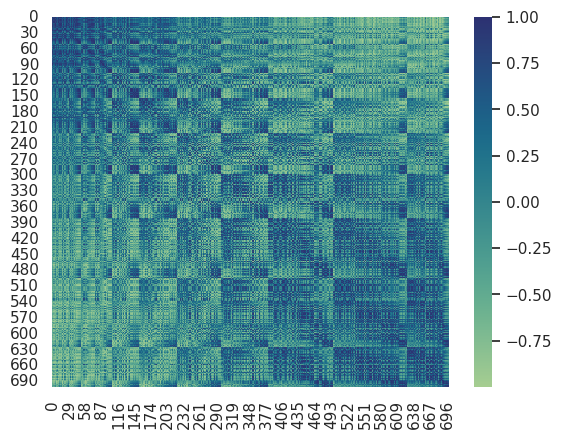

In [16]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix based on the critic ratings
similarities = cosine_similarity(critic_df)
# Show similarities heatmap
sns.heatmap(similarities, cmap='crest')

In [17]:
# Define function to get top recommendations using item-based filtering
def get_item_based_recommendations(movie_title, topk=10, return_scores=True):
    # If the movie title given by user is not in our list of movies, return NaN and print an error message
    if movie_title not in movie_names.index:
        print('Error: Given movie title is not in database...')
        return np.nan
    # If the number of top recommendations (topk) is not provided, set it to the total number of movies in the dataset
    # This is particularly useful when using this function in the hybrid recommender where we compare all the movies
    if topk is None:
        topk = len(movie_names)

    # Locate the movie ID for the given movie title and set it to movie_idx
    movie_idx = movie_names.loc[movie_title]['ID']
    # Use movie_idx to fetch the similarity scores for the given movie
    movie_similarities = similarities[movie_idx]

    # Sort the similarity scores and save them as sorted_similarities
    sorted_indices = np.argsort(movie_similarities)[::-1]
    sorted_similarities = movie_similarities[sorted_indices]
    
    # Get corresponding movie titles for the sorted scores and save them to a list
    movie_titles = movie_names['Title'].iloc[sorted_indices].tolist()
    # Save the sorted similarity scores to a list
    movie_similarities = sorted_similarities.tolist()

    # If the user chooses to see similarity scores, then zip them together with movie titles and return
    # Otherwise, return only the movie titles
    if return_scores:
        return list(zip(movie_titles, movie_similarities))[1 : topk+1]
    else:
        return movie_titles[1: topk+1]

# Example usage using the movie 'The Shawshank Redemption' as input
recommended_movies_item_based = get_item_based_recommendations("The Shawshank Redemption")
display(recommended_movies_item_based)

[('The Usual Suspects', 0.9792072029745557),
 ('Heat', 0.9703169323623075),
 ('City of God', 0.9699061217350788),
 ('Cinema Paradiso', 0.9595719620644644),
 ('The Matrix', 0.9437749517698022),
 ('The Silence of the Lambs', 0.9408737956119665),
 ('Pulp Fiction', 0.9384208849073946),
 ('American Beauty', 0.9369077777447157),
 ('Memento', 0.9366289113963607),
 ("Schindler's List", 0.9351418989654484)]

##Building Content-Based Recommender

###Based on plot

In [18]:
# Import packages
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tf-idf matrix based on plot
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(plot_df['Plot'])

# Compute cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
# Define function to get top recommendations using tfidf
def get_recommendations_tfidf(title, topk=10, return_scores=True):
    # If the movie title given by user is not in our list of movies, return NaN and print an error message
    if title not in movie_names.index:
        print('Error: Given movie title is not in database...')
        return np.nan
    # If the number of top recommendations (topk) is not provided, set it to the total number of movies in the dataset
    # This is important for the hybrid recommender, which will use this function to calculate content-based scores
    if topk is None:
        topk = len(movie_names)

    # Get the index of the movie with the given title
    idx = movie_names.loc[title].ID

    # Calculate the cosine similarity scores between the given movie and all other movies
    sim_scores = list(enumerate(cosine_sim_tfidf[idx]))

    # Sort the movies based on their cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the titles of the movies with the sorted similarity scores
    movie_titles = movie_names['Title'].iloc[[ss[0] for ss in sim_scores]].values

    # If users choose to see similarity scores, then zip them together with movie titles and return
    # Otherwise, return only the movie titles
    if return_scores:
        return list(zip(movie_titles, [ss[1] for ss in sim_scores]))[1:topk+1]
    else:
        return movie_titles[1:topk+1]

# Example usage using the movie 'The Shawshank Redemption' as input
recommended_movies_tfidf = get_recommendations_tfidf("The Shawshank Redemption")
display(recommended_movies_tfidf)

[('Oldboy', 0.13080455578377842),
 ('Rebel Without a Cause', 0.10974052500373724),
 ('The Breakfast Club', 0.10551589375862871),
 ('In the Mood for Love', 0.10486203273642868),
 ('Midnight Cowboy', 0.08628137889388521),
 ('Casino Royale', 0.08484918684827239),
 ('Mystic River', 0.0834091705101075),
 ('The Count of Monte Cristo', 0.08249819813406742),
 ('Happiness', 0.08081133324604851),
 ('Seven Pounds', 0.07915560385925965)]

##Building Hybrid Recommender

In [20]:
# Define function to get top recommendations using hybrid method
def get_hybrid_recommendations(movie_title, collab_weight=0.5, topk=10, director_bonus=0):

    # Get item-based recommendations and store them in item_result
    item_result = np.array(get_item_based_recommendations(movie_title, topk=None, return_scores=True), dtype=object)
    # Get content-based recommendations and store them in content_result
    content_result = np.array(get_recommendations_tfidf(movie_title, topk=None, return_scores=True), dtype=object)

    # Get combined scores and store in a dictionary
    combined_scores = {}

    # Normalize the scores of item-based recommendations using z-score normalization
    mean = item_result.T[1].mean()
    std = item_result.T[1].std()
    for title, score in item_result:
        combined_scores[title] = collab_weight * (score - mean) / std
    
    # Normalize the scores of content-based recommendations using z-score normalization
    mean = content_result.T[1].mean()
    std = content_result.T[1].std()
    # Add the content-based recommendation score to the combined_scores dictionary
    # If the movie title is not in the dictionary, initialize it with a default value of 0
    for title, score in content_result:
        combined_scores[title] = combined_scores.get(title, 0) + (1 - collab_weight) * (score - mean) / std

    # Apply director_bonus for the movies with the same director as the input movie
    directorID = moviesdata[moviesdata['Title'] == movie_title].iloc[0]['DirectorID']
    for title, score in combined_scores.items():
        if moviesdata[moviesdata['Title'] == title].iloc[0]['DirectorID'] == directorID:
            combined_scores[title] += director_bonus
    
    # Sort the recommendations by score in descending order and take the top 'topk' recommendations
    # The 'topk' parameter is important for controlling the number of recommendations returned by the hybrid recommender
    sorted_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:topk]
    # Return result
    return sorted_recommendations

# Example usage using different weights
for weight in np.arange(0, 1.01, 0.25):
    print(f'\nWeight = {weight}:')
    recommended_movies_hybrid = get_hybrid_recommendations("The Shawshank Redemption", collab_weight=weight, topk=5)
    display(recommended_movies_hybrid)


Weight = 0.0:


[('Oldboy', 7.351980589278071),
 ('Rebel Without a Cause', 6.122459531481062),
 ('The Breakfast Club', 5.875865081846576),
 ('In the Mood for Love', 5.837698792399763),
 ('Midnight Cowboy', 4.753134047617357)]


Weight = 0.25:


[('Oldboy', 5.680665241364919),
 ('In the Mood for Love', 4.694571875935309),
 ('Rebel Without a Cause', 4.403524750452964),
 ('The Breakfast Club', 4.234560097357552),
 ('Casino Royale', 3.6177298443725374)]


Weight = 0.5:


[('Oldboy', 4.009349893451766),
 ('In the Mood for Love', 3.551444959470857),
 ('Pulp Fiction', 3.0007955887835234),
 ('A Clockwork Orange', 2.8538637046789326),
 ('Rebel Without a Cause', 2.6845899694248665)]


Weight = 0.75:


[('Pulp Fiction', 2.526349561916533),
 ('In the Mood for Love', 2.408318043006404),
 ('Oldboy', 2.3380345455386142),
 ('A Clockwork Orange', 2.176817078472551),
 ('The Good, the Bad and the Ugly', 2.1026720331124094)]


Weight = 1.0:


[('The Usual Suspects', 2.136697829888011),
 ('Heat', 2.1182150576444507),
 ('City of God', 2.1173609869879466),
 ('Cinema Paradiso', 2.095876385691626),
 ('The Matrix', 2.06303457961621)]

##More Examples with Director Bonus

In [21]:
# Get hybrid recommendations for the movie "Psycho" with a collaborative weight of 0.8, top 10 recommendations, and a director bonus of 0.5
results1 = get_hybrid_recommendations("Psycho", collab_weight=0.8, topk=10, director_bonus=0.5)

# Iterate through the results
for title, score in results1:
    # Get the director ID for the recommended movie
    did = moviesdata[moviesdata['Title'] == title].iloc[0]['DirectorID']
    # Get the director name from the director's DataFrame using the director ID
    director = directors_df[directors_df['ID'] == did].iloc[0].name

    # Display the movie title, director name, and score in a formatted output
    # I used '<30' and '<20' to format the output, ensuring consistent and easy-to-read results
    display(f'{title: <30} by {director: <20}, score: {score}')


'North by Northwest             by Alfred Hitchcock    , score: 3.344730355752839'

'The Good, the Bad and the Ugly by Sergio Leone        , score: 2.071725201095358'

'Goodbye, Children              by Louis Malle         , score: 2.0508721337581854'

'Dog Day Afternoon              by Sidney Lumet        , score: 1.9625843156434684'

'Rear Window                    by Alfred Hitchcock    , score: 1.8841478852213287'

'Vertigo                        by Alfred Hitchcock    , score: 1.8441510395386695'

'Being There                    by Hal Ashby           , score: 1.7578420797721557'

'A Woman Under the Influence    by John Cassavetes     , score: 1.6976580501549738'

'The Conformist                 by Bernardo Bertolucci , score: 1.6967674061671212'

'Umberto D.                     by Vittorio De Sica    , score: 1.5932711852441521'

In [22]:
# Get hybrid recommendations for the movie "Inception" with a collaborative weight of 0.8, top 10 recommendations, and a director bonus of 1
results2 = get_hybrid_recommendations("Inception", collab_weight=0.8, topk=10, director_bonus=1)

# Iterate through the results
for title, score in results2:
    # Get the director ID for the recommended movie
    did = moviesdata[moviesdata['Title'] == title].iloc[0]['DirectorID']
    # Get the director name from the director's DataFrame using the director ID
    director = directors_df[directors_df['ID'] == did].iloc[0].name

    # Display the movie title, director name, and score in a formatted output
    # I used '<30' and '<20' to format the output, ensuring consistent and easy-to-read results
    display(f'{title: <30} by {director: <20}, score: {score}')


'The Prestige                   by Christopher Nolan   , score: 3.2998802857634804'

'Interstellar                   by Christopher Nolan   , score: 3.120190638351911'

'The Dark Knight                by Christopher Nolan   , score: 2.657413057966955'

'The Dark Knight Rises          by Christopher Nolan   , score: 2.5214087495921778'

'Batman Begins                  by Christopher Nolan   , score: 2.5044719366956603'

'The Lord of the Rings: The Return of the King by Peter Jackson       , score: 2.451353016580162'

'Memento                        by Christopher Nolan   , score: 2.2906902828362425'

'X-Men: Days of Future Past     by Bryan Singer        , score: 1.9544864235127004'

'Kill Bill: Vol. 1              by Quentin Tarantino   , score: 1.821183314224883'

'Back to the Future             by Robert Zemeckis     , score: 1.72831672543293'

## Conclusions

Overall, the recommender system appears to be yielding satisfactory results, with many of its recommendations being logical and relevant to the specified movie. Even though I was not able to obtain taglines for each movie, but normalizing the scores and adding the director bonus feature, have positively impacted the overall performance. This recommender would likely prove valuable to individuals seeking to explore renowned films they may have previously overlooked, providing them with a tailored experience based on their preferences for content-based and collaborative filtering approaches.

## My References

Visualizations:

1. https://seaborn.pydata.org/generated/seaborn.heatmap.html
2. https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
3. https://stackoverflow.com/questions/8450472/how-to-print-a-string-at-a-fixed-width
4. https://scientificallysound.org/2016/10/17/python-print3/

Coding:

1. https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab
2. https://blog.csdn.net/qq_42306860/article/details/97140978
3. https://stackoverflow.com/questions/40323321/creating-a-sparse-matrix-with-lightfm-and-print-predictions
4. https://medium.com/analytics-vidhya/content-based-recommender-systems-in-python-2b330e01eb80
5. https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
6. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

Partially inspired by my own project for Prof. Topor's class:
1. https://github.com/fbhsaid/DAV6300/blob/main/Prof%20Topor's%20Class%20Final%20Project.ipynb